- 2024.09.02
- 2024.09.07

page 26.

---

### One Parameter Model

<font color='blue'>Let p be the prob of success.</font>

Collect data $Y$, $Y\sim Binomial(n, p)$.

Likelihood: $\color{red}L(p|y) \propto p^{y}(1-p)^{n-y}$

prior information: $\pi(p)$

get $\pi(p|y)=\frac{\textcolor{brown}{f(y|p)}\times\pi(p)}{f(y)}=\frac{\textcolor{red}{L(p|y)} \times\pi(p)}{\int \textcolor{red}{L(p|y)}\times \pi(p)dp}$

#### Beta-Binomial example

If no. of success $Y=80$, $n=100$, and $\pi(\theta) \propto 1$

then
$\pi(\theta |y )=\frac{\textcolor{red}{L(\theta|y)} \times\pi(\theta)}{\int \textcolor{red}{L(\theta|y)}\times \pi(\theta)d\theta} 
=\frac{\theta^{y}(1-\theta)^{n-y}\times 1}{\int \theta^{y}(1-\theta)^{n-y}\times 1 d\theta}$
$=\frac{\theta^{y}(1-\theta)^{n-y}}{B(y+1,n-y+1)}\sim Beta(y+1,n-y+1)=Beta(81,21)$

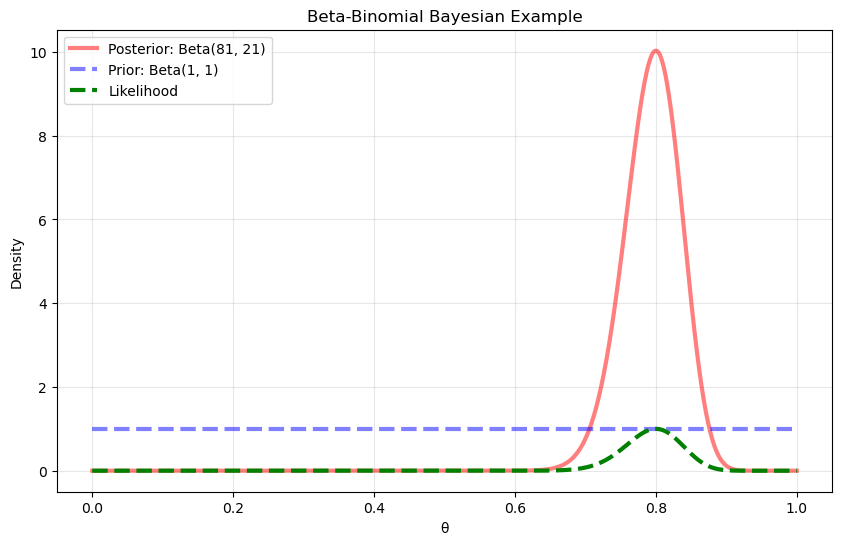

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta


# 設置參數
n = 100  # 總試驗次數
y = 80   # 成功次數
alpha_prior = 1
beta_prior = 1
alpha_posterior = 1 + y
beta_posterior = 1 + n - y

# theta值的範圍
theta = np.linspace(0, 1, 1000)

# 計算先驗、似然和後驗
prior = beta.pdf(theta, alpha_prior, beta_prior)
likelihood = theta**y * (1-theta)**(n-y)
posterior = beta.pdf(theta, alpha_posterior, beta_posterior)

# 正規化? 調比例
likelihood = likelihood / np.max(likelihood) 

# 繪圖
plt.figure(figsize=(10, 6))
plt.plot(theta, posterior, label='Posterior: Beta(81, 21)', color='red', alpha=0.5,linewidth=3)
plt.plot(theta, prior, label='Prior: Beta(1, 1)', color='blue',linestyle = '--', alpha=0.5,linewidth=3)
plt.plot(theta, likelihood, label='Likelihood', color='green',linestyle = '--',linewidth=3)

plt.xlabel('θ')
plt.ylabel('Density')
plt.title('Beta-Binomial Bayesian Example')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

C:\Users\Yvonne\AppData\Local\Temp\ipykernel_28492\1413648994.py:27: RuntimeWarning: divide by zero encountered in log
  plt.plot(theta, (np.log(likelihood)+500)/100, label='Likelihood:(log(likelihood(0,1,1000))+500)/100)', color='green',linestyle = '--')


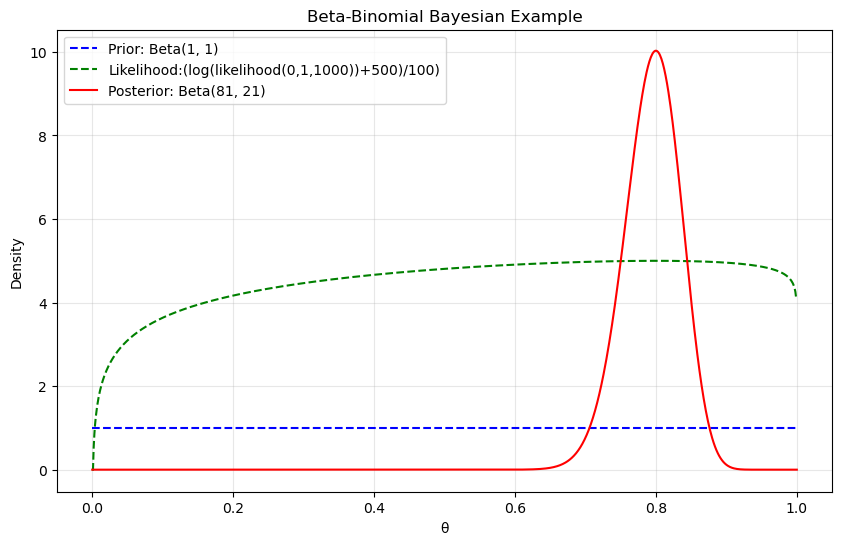

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# 設置參數
n = 100  # 總試驗次數
y = 80   # 成功次數
alpha_prior = 1
beta_prior = 1
alpha_posterior = 1 + y
beta_posterior = 1 + n - y

# theta值的範圍
theta = np.linspace(0, 1, 1000)

# 計算先驗、似然和後驗
prior = beta.pdf(theta, alpha_prior, beta_prior)
likelihood = theta**y * (1-theta)**(n-y)
posterior = beta.pdf(theta, alpha_posterior, beta_posterior)

# 正規化似然函數以便於比較
likelihood = likelihood / np.max(likelihood)

# 繪圖
plt.figure(figsize=(10, 6))
plt.plot(theta, prior, label='Prior: Beta(1, 1)', color='blue',linestyle = '--')
plt.plot(theta, (np.log(likelihood)+500)/100, label='Likelihood:(log(likelihood(0,1,1000))+500)/100)', color='green',linestyle = '--')
plt.plot(theta, posterior, label='Posterior: Beta(81, 21)', color='red')
plt.xlabel('θ')
plt.ylabel('Density')
plt.title('Beta-Binomial Bayesian Example')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [86]:
import pymc as pm
import arviz as az
a=1
b=1
success_y=80
n_100=100

# observation data
trials = n_100
print(f"Trials:\t{n_100}\nsuccesss:\t{success_y}")
print(f'Observed P(success) = {success_y/trials}')

with pm.Model() as model:
        # Define the prior beta distribution
    theta_prior = pm.Beta('theta_prior', a,b)
    
    # Observed outcomes in the sample dataset.
    observations = pm.Binomial('obs',
                               n = n_100,
                               p = theta_prior,
                               observed = success_y)
     
    # NUTS, the No U-Turn Sampler (Hamiltonian)
    step = pm.NUTS()     
    # Evaluate draws=n on chains=n 
    trace = pm.sample(draws=500,step=step, random_seed=123)  

Trials:	100
successs:	80
Observed P(success) = 0.8


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [prior]


Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 14 seconds.


In [73]:
# observation data
trials = n_100
print(f"Trials:\t\t{n_100}\nsuccesss:\t{success_y}")
print(f'Observed P(success) = {success_y/trials}')
model

Trials:		100
successs:	80
Observed P(success) = 0.8


In [80]:
summary = pm.summary(trace)
summary

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
prior,0.794,0.041,0.711,0.862,0.001,0.001,837.0,1222.0,1.0


<Axes: title={'center': 'prior'}>

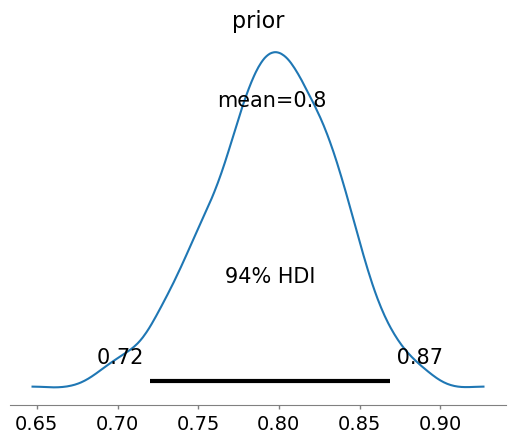

In [87]:
pm.plot_posterior(trace)

---

Reference:

- The beta-binomial model: an introduction to Bayesian statistics. by Rodrigo Morales, 2022.
https://medium.com/@romoflow/the-beta-binomial-model-an-introduction-to-bayesian-statistics-154395875f93

    Code to reproduce example(with prior/posterior/likelihood plot) available at:
    https://github.com/Romoflow/beta-binomial/blob/master/model.ipynb

Book:

- Martin Osvaldo A, Kumar Ravin; Lao Junpeng Bayesian Modeling and Computation in Python Boca Ratón, 2021. ISBN 978-0-367-89436-8

    Fig. 1.1: https://bayesiancomputationbook.com/markdown/chp_01.html

    Repository: https://github.com/BayesianModelingandComputationInPython/BookCode_Edition1


- Kruschke, J. K. (2011). Doing Bayesian data analysis: A tutorial with R and BUGS. Elsevier Academic Press.
https://www.elsevier.com/books/doing-bayesian-data-analysis/kruschke/978-0-12-405888-0
-0